In [5]:
import numpy as np


In [1]:
!pip uninstall scikit-learn --yes

Found existing installation: scikit-learn 1.4.2
Uninstalling scikit-learn-1.4.2:
  Successfully uninstalled scikit-learn-1.4.2


In [2]:
!pip uninstall imblearn --yes


Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0


In [3]:
!pip install scikit-learn==1.2.2

  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/2f/fd/9fcbe7fe94150e72d87120cbc462bde1971c3674e726b81f4a4c4fdfa8e1/scikit_learn-1.2.2-cp311-cp311-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 631.8 kB/s eta 0:00:00m eta 0:00:010:00:01


In [4]:
!pip install imblearn

  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [6]:
import json
with open('../artifact/kaggle.json','r') as file:
    data = json.load(file)

In [7]:
data

{'username': 'dhanukasdissanayaka', 'key': '8987f062602c88783ed6180bfb9c14c8'}

In [8]:
data['username']

'dhanukasdissanayaka'

In [9]:
!pip install kaggle

In [10]:
import os 
os.environ['KAGGLE_USERNAME'] = data['username']
os.environ['KAGGLE_KEY'] = data['key']

In [11]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [12]:
api.dataset_download_files('dineshpiyasamara/sentiment-analysis-dataset',path = '../artifact/')

Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/sentiment-analysis-dataset


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('../artifact/sentiment_analysis.csv')

In [15]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [16]:
data.duplicated().sum()

0

In [17]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

Process Dataset


In [18]:
import re
import string

Convert Uppercase -- >. Lowercase 

In [19]:
data['tweet'] = data['tweet'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [20]:
data['tweet']

0       #fingerprint #pregnancy test https://goo.gl/h1...
1       finally a transparant silicon case ^^ thanks t...
2       we love this! would you go? #talk #makememorie...
3       i'm wired i know i'm george i was made that wa...
4       what amazing service! apple won't even talk to...
                              ...                        
7915    live out loud #lol #liveoutloud #selfie #smile...
7916    we would like to wish you an amazing day! make...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my #smart #pocket #wifi stay conne...
7919    apple barcelona!!! #apple #store #bcn #barcelo...
Name: tweet, Length: 7920, dtype: object

Remove links 


In [21]:
data['tweet'] = data['tweet'].apply(lambda x:" ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags =re.MULTILINE) for x in x.split()))

Remove Punctuation 


String Punctuation. 


In [22]:
def remove_punctuatios(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
data['tweet'] = data['tweet'].apply(remove_punctuatios)

In [23]:
data['tweet']

0       fingerprint pregnancy test  android apps beaut...
1       finally a transparant silicon case  thanks to ...
2       we love this would you go talk makememories un...
3       im wired i know im george i was made that way ...
4       what amazing service apple wont even talk to m...
                              ...                        
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, Length: 7920, dtype: object

Remove Numbers

In [24]:
data['tweet'] = data['tweet'].str.replace('\d+', '',regex = True)

In [25]:
data['tweet']

0       fingerprint pregnancy test  android apps beaut...
1       finally a transparant silicon case  thanks to ...
2       we love this would you go talk makememories un...
3       im wired i know im george i was made that way ...
4       what amazing service apple wont even talk to m...
                              ...                        
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, Length: 7920, dtype: object

Remove Stopwords

In [26]:
!pip install nltk

In [27]:
import nltk

In [28]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

Extract "English words from the  stopwords"

In [29]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [30]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

REMOVE STOPWORDS FROM "tweet"

In [31]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [32]:
data['tweet']

0       fingerprint pregnancy test android apps beauti...
1       finally transparant silicon case thanks uncle ...
2       love would go talk makememories unplug relax i...
3       im wired know im george made way iphone cute d...
4       amazing service apple wont even talk question ...
                              ...                        
7915    live loud lol liveoutloud selfie smile sony mu...
7916    would like wish amazing day make every minute ...
7917    helping lovely year old neighbor ipad morning ...
7918    finally got smart pocket wifi stay connected a...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, Length: 7920, dtype: object

Stemming Progress 


In [34]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [35]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [36]:
data['tweet']

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

## jupyter vocab


In [37]:
from collections import Counter
vocab = Counter()

In [38]:
data['tweet']

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [39]:
for sent in data['tweet']:
    vocab.update(sent.split())

In [40]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [41]:
tokens = [key for key in vocab if vocab[key]>10]

In [42]:
len(tokens)


1145

In [43]:
def save_vocab(lines,filename):
    data = '\n'.join(lines)
    file = open(filename, 'w',encoding = 'utf-8')
    file.write(data)
    file.close()
    
save_vocab(tokens,'../static/model/vocab.txt')

In [44]:
##Devide Dataset

In [45]:
x = data['tweet']
y = data['label']

In [46]:
import numpy as np

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)


In [55]:
x_train.shape


(6336,)

In [56]:
x_test.shape

(1584,)

In [57]:
def vectorizer(ds,vocab):
    vec_list = []
    
    for sent in ds:
        sent_list = np.zeros(len(vocab))
        
        for i in range(len(vocab)):
            if vocab[i] in sent.split():
                sent_list[i] = 1
        vec_list.append(sent_list)
    vec_list_new = np.asarray(vec_list,dtype = np.float32)
    return vec_list_new

In [58]:
vectorized_x_train = vectorizer(x_train,tokens)
vectorized_x_test = vectorizer(x_test,tokens)

In [59]:
for i in vectorized_x_train[0]:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


# Check for Data Imbalance

In [60]:
y_train.value_counts()

label
0    4724
1    1612
Name: count, dtype: int64

data set is an imbalanced data set the model will bias to predicts as a Positive Class


In [61]:
y_train.value_counts()

label
0    4724
1    1612
Name: count, dtype: int64

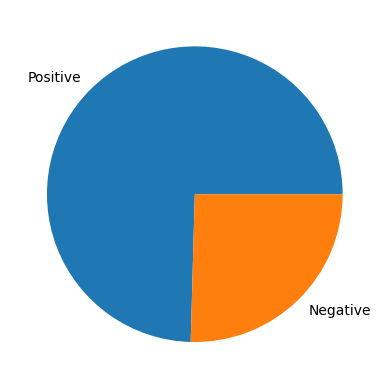

In [62]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels = ['Positive','Negative'])
plt.show()

In [63]:
!pip install --upgrade imblearn
!pip install scikit-learn== 1.2.2


ERROR: Could not find a version that satisfies the requirement scikit-learn== (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21.1, 0.21.2, 0.21.3, 0.22, 0.22.1, 0.22.2.post1, 0.23.0, 0.23.1, 0.23.2, 0.24.0, 0.24.1, 0.24.2, 1.0, 1.0.1, 1.0.2, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.2.0rc1, 1.2.0, 1.2.1, 1.2.2, 1.3.0rc1, 1.3.0, 1.3.1, 1.3.2, 1.4.0rc1, 1.4.0, 1.4.1.post1, 1.4.2, 1.5.0rc1)
ERROR: No matching distribution found for scikit-learn==


In [95]:
!pip show scikit-learn
!pip show imbalanced-learn


Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /Users/danuka/anaconda3/lib/python3.11/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
Name: imbalanced-learn
Version: 0.10.1
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: /Users/danuka/anaconda3/lib/python3.11/site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: imblearn


In [64]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote,y_train_smote = smote.fit_resample(vectorized_x_train,y_train)

In [65]:
print(vectorized_x_train_smote.shape , y_train_smote.shape)

(9448, 1145) (9448,)


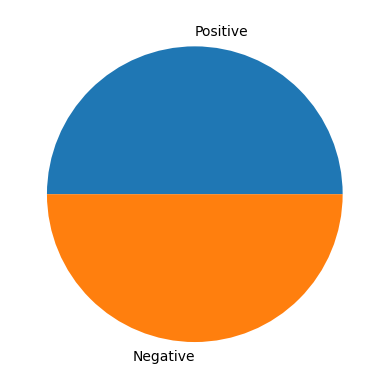

In [66]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]),labels = ['Positive','Negative'])
plt.show()

In [67]:
y_test

2681    1
2862    1
7445    0
3337    0
6378    0
       ..
5716    0
3046    1
1718    0
4145    1
2204    0
Name: label, Length: 1584, dtype: int64

In [68]:
vectorized_x_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Model Building and Evaluating

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [72]:
from sklearn.metrics import accuracy_score ,f1_score, precision_score,recall_score 


def  training_scores(y_act , y_pred):
    acc  = round(accuracy_score(y_act,y_pred),3)
    f1  = round(f1_score(y_act,y_pred),3)
    pr  = round(precision_score(y_act,y_pred),3)
    re  = round(recall_score(y_act,y_pred),3)
    print(f'Training Scores :\n \t Accuracy ={acc} \n\t F1_score ={f1} \n\t Precision ={pr} \n\t Recall_Score ={re}')
    
def  validating_scores(y_act , y_pred):
    acc  = round(accuracy_score(y_act,y_pred),3)
    f1  = round(f1_score(y_act,y_pred),3)
    pr  = round(precision_score(y_act,y_pred),3)
    re  = round(recall_score(y_act,y_pred),3)
    print(f'Testing Scores :\n \t Accuracy ={acc} \n\t F1_score ={f1} \n\t Precision ={pr} \n\t Recall_Score ={re}')
        
    

# Model for Logistic regression

In [88]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

training_scores(y_train_smote,y_train_pred)

y_test_pred = lr.predict(vectorized_x_test)

validating_scores(y_test,y_test_pred)

Training Scores :
 	 Accuracy =0.94 
	 F1_score =0.942 
	 Precision =0.916 
	 Recall_Score =0.969
Testing Scores :
 	 Accuracy =0.864 
	 F1_score =0.765 
	 Precision =0.699 
	 Recall_Score =0.843


# Model for Naive Bayes

In [89]:
ml = MultinomialNB()
ml.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = ml.predict(vectorized_x_train_smote)

training_scores(y_train_smote,y_train_pred)

y_test_pred = ml.predict(vectorized_x_test)

validating_scores(y_test,y_test_pred)

Training Scores :
 	 Accuracy =0.906 
	 F1_score =0.911 
	 Precision =0.869 
	 Recall_Score =0.957
Testing Scores :
 	 Accuracy =0.858 
	 F1_score =0.772 
	 Precision =0.665 
	 Recall_Score =0.918


# Model for DecisionTreeClassifier

In [90]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

training_scores(y_train_smote,y_train_pred)

y_test_pred = dt.predict(vectorized_x_test)

validating_scores(y_test,y_test_pred)

Training Scores :
 	 Accuracy =1.0 
	 F1_score =1.0 
	 Precision =1.0 
	 Recall_Score =1.0
Testing Scores :
 	 Accuracy =0.834 
	 F1_score =0.675 
	 Precision =0.691 
	 Recall_Score =0.659


# Model for RandomForestClassifier

In [91]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

training_scores(y_train_smote,y_train_pred)

y_test_pred = rf.predict(vectorized_x_test)

validating_scores(y_test,y_test_pred)

Training Scores :
 	 Accuracy =1.0 
	 F1_score =1.0 
	 Precision =1.0 
	 Recall_Score =1.0
Testing Scores :
 	 Accuracy =0.875 
	 F1_score =0.76 
	 Precision =0.762 
	 Recall_Score =0.758


# Model for SVC

In [93]:
svc = SVC()
svc.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = svc.predict(vectorized_x_train_smote)

training_scores(y_train_smote,y_train_pred)

y_test_pred = svc.predict(vectorized_x_test)

validating_scores(y_test,y_test_pred)

Training Scores :
 	 Accuracy =0.978 
	 F1_score =0.978 
	 Precision =0.961 
	 Recall_Score =0.996
Testing Scores :
 	 Accuracy =0.875 
	 F1_score =0.774 
	 Precision =0.734 
	 Recall_Score =0.819


In [95]:
import pickle
with open ('../static/model/model.pickle','wb') as file:
    pickle.dump(svc,file)

In [ ]:
x_test